In [16]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


### 1. Loading the Dataset

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Display the dataset keys to understand its structure
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


### 2. Understanding the Data

In [4]:
# Create a DataFrame from the diabetes data
df_features = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_target = pd.DataFrame(diabetes.target, columns=['target'])

# Display the first few rows of the DataFrame
print(df_features.head())
print(df_target.head())

# Check for missing values
print(df_features.isnull().sum())
print(df_target.isnull().sum())

# Get summary statistics
print(df_features.describe())
print(df_target.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
target    0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   

### 3. Creating a DataFrame

In [5]:
# Concatenate features and target variable to create a single DataFrame
df = pd.concat([df_features, df_target], axis=1)

# Display the first few rows of the concatenated DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


### 4. Splitting the Data

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


### 5. Initializing & Training the Model
> Linear regression is a simple, parametric model that assumes a linear relationship between the independent and dependent variables. It is highly interpretable, with coefficients indicating the impact of each feature on the target variable. This model is computationally efficient but can underperform if the actual relationship between variables is non-linear or if there are complex interactions among the features. It also assumes constant variance of errors, normally distributed residuals, and independence of errors.


In [11]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


### 6. Making Predictions

In [12]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print(y_pred[:5])

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


### 7. Evaluating the Model

In [21]:
# Calculate the mean squared error
lr_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {lr_mse}")

Mean Squared Error: 2900.193628493482


### A. Implementing Decision Tree Regression
> Decision tree regression is a non-parametric model that creates a tree structure to make decisions based on feature values, without assuming any specific form of the relationship between the variables. This model can capture non-linear relationships and feature interactions well, making it more flexible than linear regression. However, decision trees can become overly complex and prone to overfitting if not properly pruned or regularized. While the tree structure can be visualized for interpretability, it becomes less clear as the tree grows larger.

In [17]:
# Initialize the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = tree_model.score(X_test, y_test)

print(f"Decision Tree Mean Squared Error: {tree_mse}")
print(f"Decision Tree R^2: {tree_r2}")

Decision Tree Mean Squared Error: 4976.797752808989
Decision Tree R^2: 0.060653981041140725


### B. Implementing Random Forest Regression
> Random forest regression is an ensemble model that combines multiple decision trees to create a more robust and accurate model. It reduces overfitting by averaging the results of many trees, thus decreasing variance while maintaining the ability to handle non-linear relationships and complex interactions among features. Although it is less interpretable than a single decision tree and more computationally intensive, random forest regression generally offers better performance and robustness, making it a powerful tool for predictive modeling in diverse applications.

In [18]:
# Initialize the random forest regressor
forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_forest_pred = forest_model.predict(X_test)

# Evaluate the model
forest_mse = mean_squared_error(y_test, y_forest_pred)
forest_r2 = forest_model.score(X_test, y_forest_pred)

print(f"Random Forest Mean Squared Error: {forest_mse}")
print(f"Random Forest R^2: {forest_r2}")

Random Forest Mean Squared Error: 2952.0105887640448
Random Forest R^2: 1.0


### C. Visualizing Correlation Between Features and Target Variable

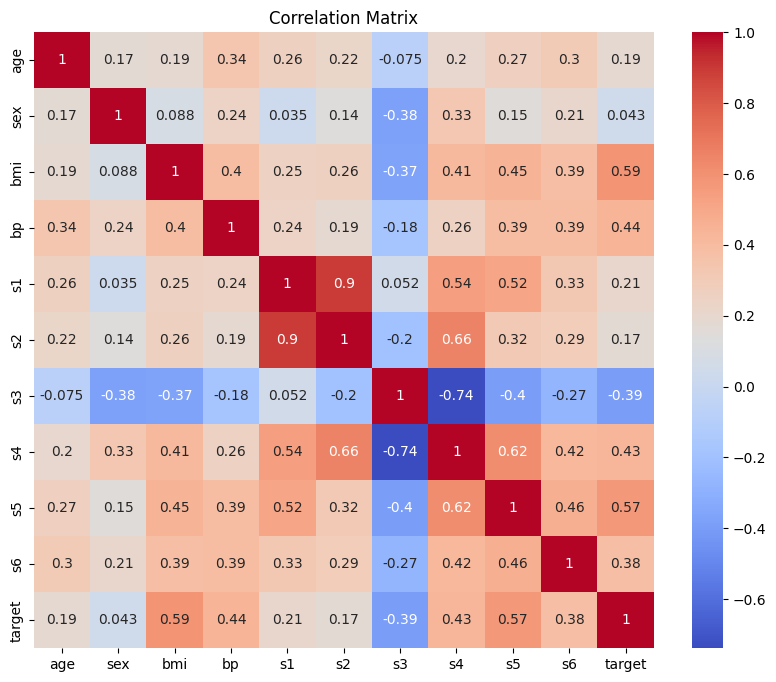

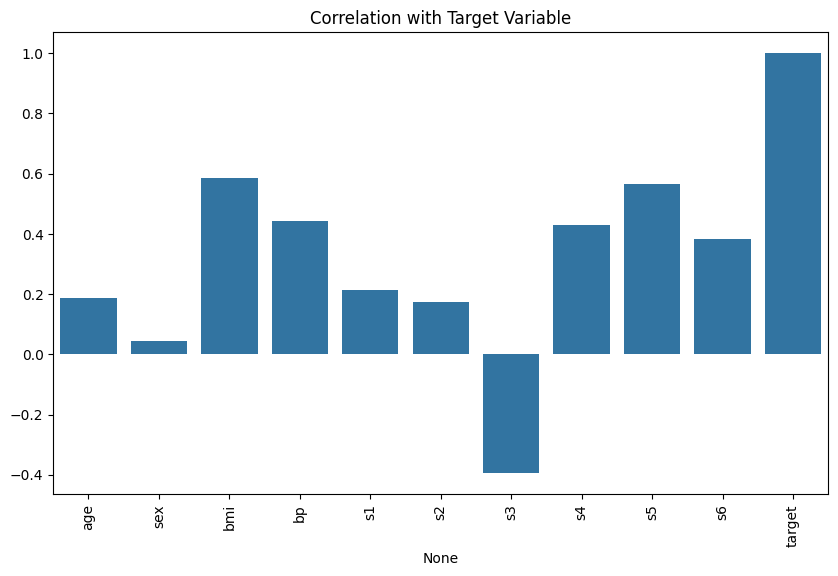

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot correlation of each feature with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_matrix['target'].index, y=corr_matrix['target'].values)
plt.title('Correlation with Target Variable')
plt.xticks(rotation=90)
plt.show()

### D. Evaluating the Models on Different Metrics

### Mean Squared Error (MSE)
Mean Squared Error (MSE) is a metric used to evaluate the performance of a regression model. It measures the average of the squares of the errors, where the error is the difference between the actual value and the predicted value. Mathematically, it is defined as:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where \( y_i \) is the actual value, \( \hat{y}_i \) is the predicted value, and \( n \) is the number of observations. MSE gives more weight to larger errors due to squaring, making it sensitive to outliers. A lower MSE indicates a better fit.

### Mean Absolute Error (MAE)
Mean Absolute Error (MAE) is another metric used to evaluate regression models. It measures the average of the absolute errors, where the error is the difference between the actual value and the predicted value. Mathematically, it is defined as:

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

MAE provides a more straightforward measure of error by averaging the absolute differences between actual and predicted values. It is less sensitive to outliers compared to MSE. A lower MAE indicates a better fit.

### R-squared (R²)
R-squared (R²), also known as the coefficient of determination, is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It is defined as:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

where \( y_i \) is the actual value, \( \hat{y}_i \) is the predicted value, \( \bar{y} \) is the mean of the actual values, and \( n \) is the number of observations. R² ranges from 0 to 1, where 0 indicates that the model explains none of the variance in the dependent variable and 1 indicates that the model explains all the variance. A higher R² indicates a better fit.

### Summary of Differences
- **MSE**: Measures the average squared differences between actual and predicted values, emphasizing larger errors. Sensitive to outliers.
- **MAE**: Measures the average absolute differences between actual and predicted values, providing a straightforward error measure. Less sensitive to outliers compared to MSE.
- **R²**: Indicates the proportion of the variance in the dependent variable explained by the model. Ranges from 0 to 1, with higher values indicating better explanatory power.

These metrics provide different perspectives on the performance of a regression model, and often, multiple metrics are used together to get a comprehensive evaluation.


In [22]:
# Linear Regression evaluation
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R^2: {lr_r2}")

# Decision Tree evaluation
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

print(f"Decision Tree MAE: {tree_mse}")
print(f"Decision Tree MAE: {tree_mae}")
print(f"Decision Tree R^2: {tree_r2}")

# Random Forest evaluation
forest_mae = mean_absolute_error(y_test, y_forest_pred)
forest_r2 = r2_score(y_test, y_forest_pred)

print(f"Random Forest MAE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")
print(f"Random Forest R^2: {forest_r2}")


Linear Regression MSE: 2900.193628493482
Linear Regression MAE: 42.79409467959994
Linear Regression R^2: 0.4526027629719195
Decision Tree MAE: 4976.797752808989
Decision Tree MAE: 54.52808988764045
Decision Tree R^2: 0.060653981041140725
Random Forest MAE: 2952.0105887640448
Random Forest MAE: 44.053033707865175
Random Forest R^2: 0.4428225673999313


### D. Training with MAE as the Loss Function

In [24]:
# Decision Tree with MAE
tree_model_mae = DecisionTreeRegressor(criterion='absolute_error', random_state=42)
tree_model_mae.fit(X_train, y_train)
y_tree_mae_pred = tree_model_mae.predict(X_test)
tree_mae_loss = mean_absolute_error(y_test, y_tree_mae_pred)

print(f"Decision Tree MAE Loss: {tree_mae_loss}")

# Random Forest with MAE
forest_model_mae = RandomForestRegressor(criterion='absolute_error', random_state=42)
forest_model_mae.fit(X_train, y_train)
y_forest_mae_pred = forest_model_mae.predict(X_test)
forest_mae_loss = mean_absolute_error(y_test, y_forest_mae_pred)

print(f"Random Forest MAE Loss: {forest_mae_loss}")

Decision Tree MAE Loss: 71.10112359550561
Random Forest MAE Loss: 44.14741573033708
